In [1]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Air = mp.Medium(index=1)

In [3]:
cell_size = (2,2,0)

boundary_layer = [
    mp.PML(0.3, mp.X),
    mp.PML(0.3, mp.Y)
                  ]

In [4]:
lambda_min = 0.4
lambda_max = 0.7
fmin = 1 / lambda_min
fmax = 1 / lambda_max
fcen = 0.5 * (fmin+fmax)
df = fmax - fmin
resolution = 200
nfreq = 50

In [5]:
source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=source_center
)]

In [6]:
sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

In [7]:
# --- Flux 모니터 4면 등록 (tight box 기준) ---
offset = 0.01
flux_size_x = 0.02
flux_size_y = 0.02

# Dipole 위치
source_center = mp.Vector3(0, 0, 0)

# 박스 4면
flux_x1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center - mp.Vector3(offset, 0, 0),
    size=mp.Vector3(0, flux_size_y, 0),
    direction=mp.Y,
    weight=-1
))

flux_x2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center + mp.Vector3(offset, 0, 0),
    size=mp.Vector3(0, flux_size_x, 0),
    direction=mp.Y
))

flux_y1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center - mp.Vector3(0, offset, 0),
    size=mp.Vector3(flux_size_y, 0),
    direction=mp.Y,
    weight=-1
))

flux_y2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center + mp.Vector3(0, offset, 0),
    size=mp.Vector3(flux_size_y, 0),
    direction=mp.Y
))


In [8]:
sim.run(until=5)

Px1 = mp.get_fluxes(flux_x1)
Px2 = mp.get_fluxes(flux_x2)

Py1 = mp.get_fluxes(flux_y1)
Py2 = mp.get_fluxes(flux_y2)

freqs = mp.get_flux_freqs(flux_x1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000248909 s
Working in 2D dimensions.
Computational cell is 2 x 2 x 0 with resolution 200
time for set_epsilon = 0.082372 s
-----------
run 0 finished at t = 5.0 (2000 timesteps)


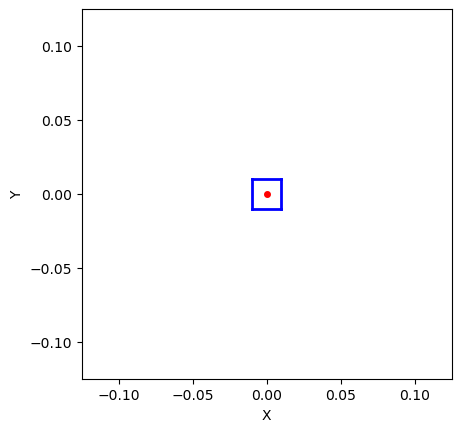

In [9]:
sim.plot2D(
    output_plane=mp.Volume(center = mp.Vector3(0,0,0), size = mp.Vector3(0.25,0.25,0))
)
plt.show()

In [10]:
Px1 = np.array(Px1)
Px2 = np.array(Px2)
Py1 = np.array(Py1)
Py2 = np.array(Py2)


In [11]:
net_power = (Px1+Px2+Py1+Py2)
print(net_power)
print(freqs)

[-0.07898348 -0.06787313 -0.0345193   0.00695121  0.03709145  0.03967844
  0.00965259 -0.04325047 -0.09730128 -0.12745558 -0.11665374 -0.06494697
  0.00793568  0.06860537  0.0831595   0.03276693 -0.07459169 -0.20166051
 -0.29099042 -0.28345406 -0.14014944  0.14023827  0.5155057   0.90857497
  1.22870022  1.3985575   1.37814356  1.17725907  0.85220827  0.48783052
  0.17107872 -0.03480113 -0.10688289 -0.06488027  0.04067784  0.14929907
  0.21240855  0.20845353  0.14647568  0.05801222 -0.01845897 -0.05386697
 -0.03930386  0.01246868  0.07447063  0.11808369  0.12518372  0.09487353
  0.04245488 -0.00834474]
[2.5, 2.478134110787172, 2.456268221574344, 2.434402332361516, 2.412536443148688, 2.39067055393586, 2.368804664723032, 2.3469387755102042, 2.325072886297376, 2.303206997084548, 2.2813411078717203, 2.259475218658892, 2.237609329446064, 2.2157434402332363, 2.193877551020408, 2.17201166180758, 2.1501457725947524, 2.128279883381924, 2.1064139941690962, 2.0845481049562684, 2.0626822157434406,

In [12]:
wavelengths = [1/f for f in freqs]

# ------------Homogeneous dipole sourcepower------------

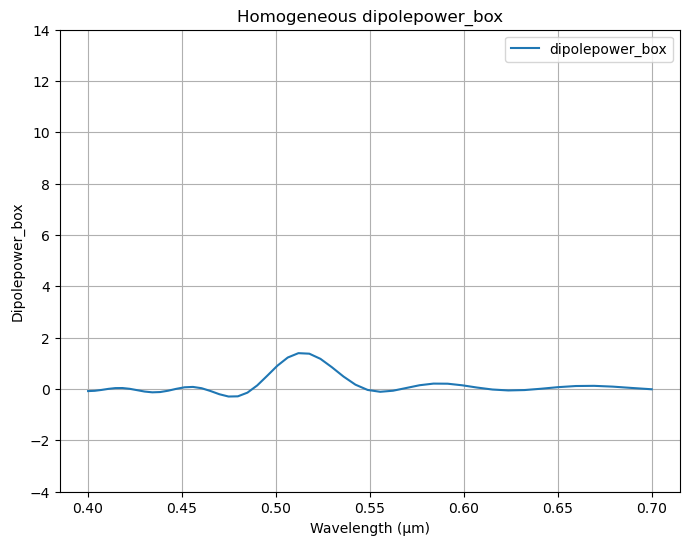

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(wavelengths, net_power, '-', label='dipolepower_box')
plt.xlabel('Wavelength (μm)')
plt.ylabel('Dipolepower_box')
plt.title('Homogeneous dipolepower_box')
plt.ylim(-4, 14)  # y축 최소값: -4, 최대값: 14
plt.legend()
plt.grid(True)
plt.show()